In [62]:
import os
import json

# Choose to evaluate the results using commands in (1) or (2):

# ------------------------------------------------------------------------------------ #

### (1) Evaluating methods with GT bboxes: load validation results

### Baseline (Image-based) 
result_dir = './output/BASELINE_32x2_R50_SHORT_SCRATCH_EVAL_GT'

### Baseline (SlowFast)
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT'

### Baseline (SlowFast) + Trajectory
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT_trajectory'

### Baseline (SlowFast) + Trajectory + (BN&FCs&ReLU)
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT_trajectory-proj_fcs-norm_feat-sep_sub_obj_fcs-bn_10xlr'

### Baseline (SlowFast) + relativity feature
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT_relativity-feat'

### Baseline (SlowFast) + Trajectory + human pose
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT_trajectory-human_pose'

### Baseline (SlowFast) + Trajectory + human pose + (BN&FCs&ReLU)
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT_trajectory-proj_fcs-norm_feat-sep_sub_obj_fcs-bn_10xlr-human_pose'

### Baseline (SlowFast) + Trajectory + ToI Pooling
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT_trajectory-toipool'

### Baseline (SlowFast) + Trajectory + Spatial Configuration Module
# result_dir = 'output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT_trajectory-spa_conf'

### Baseline (SlowFast) + Trajectory + ToI Pooling + Spatial Configuration Module
# result_dir = 'output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT_trajectory-toipool-spa_conf'

# ------------------------------------------------------------------------------------ #

### (1-1) Evaluating above methods with 22,808 examples in total
result_json_name = 'all_results_vidor_checkpoint_epoch_00020.pyth_proposal_less-168-examples.json'

# ------------------------------------------------------------------------------------ #

### (2) OR evaluating methods WITH DETECTED BBOXES loaded from vidvrd-mff: load validation results

# Baseline (Image-based) 
# result_dir = 'output/BASELINE_32x2_R50_SHORT_SCRATCH_EVAL_NONGT'
# result_json_name = 'all_results_vidor_checkpoint_epoch_00020.pyth_proposal.json'

# Baseline (SlowFast) 
# result_dir = 'output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_NONGT'
# result_json_name = 'all_results_vidor_checkpoint_epoch_00020.pyth_proposal.json'

# Baseline (SlowFast) & trajectory
# result_dir = 'output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_NONGT_trajectory'
# result_json_name = 'all_results_vidor_checkpoint_epoch_00020.pyth_proposal.json'

# Baseline (SlowFast) & trajectory & ToI Pooling
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_NONGT_trajectory-toipool'
# result_json_name = 'all_results_vidor_checkpoint_epoch_00020.pyth_proposal.json'

# Baseline (SlowFast) & trajectory & Spatial Configuation Module
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_NONGT_trajectory-spa_conf'
# result_json_name = 'all_results_vidor_checkpoint_epoch_00020.pyth_proposal_less-168-examples.json'

# Baseline (SlowFast) & trajectory + ToI POoling + Spatial Configuation Module
# result_dir = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_NONGT_trajectory-toipool-spa_conf/'
# result_json_name = 'all_results_vidor__proposal_less-168-examples.json'

# ------------------------------------------------------------------------------------ #

with open(os.path.join(result_dir, result_json_name), 'r') as f:
    all_results = json.load(f)

In [65]:
# Settings

delete_less_than_25_instances = False # non-rare setting
delete_more_than_25_instances = True # rare setting
assert not (delete_less_than_25_instances and delete_more_than_25_instances)

# For computing Temporal-mAP
only_evaluate_temporal_predicates = False # should be True when visualizing correct prediction!

### Settings for visualizing demo images purpose only
is_demo = False
is_demo_incorrect_hois = False
is_demo_save_imgs = False
is_demo_show_imgs = False
is_demo_top_10 = False # may be used with incorrect hois

only_demo_specific_videos = False
only_demo_specific_frames = False
to_demo_video_names = []
to_demo_frame_names = []

if is_demo:
#     assert only_evaluate_temporal_predicates ^ is_demo_incorrect_hois # sanity check!
    demo_vis_name = 'vidhoi_2D' # 'vidor_TP'
#     if is_demo_incorrect_hois:
#         demo_vis_name += '_wrong'
    if only_evaluate_temporal_predicates:
        demo_vis_name += '_onlytemp'
    if only_demo_specific_videos:
        to_demo_video_names = [
            '1110/2584172238',
        ]
        demo_vis_name += '_specvids'
    elif only_demo_specific_frames:
        to_demo_frame_names = [
#             '0080/9439876127',
#             '1009/2975784201_000106',
#             '1009/2975784201_000136',
#             '1009/2975784201_000166',
#             '1009/2975784201_000196',
#             '1009/2975784201_000226',
#             '1009/2975784201_000256',
#             '1009/4488998616',
#             '1009/4896969617_000016',
#             '1009/4896969617_000046',
#             '1009/4896969617_000076',
#             '1009/4896969617_000226',
#             '1009/4896969617_000256',
#             '1009/4896969617_000286',
#             '1017/4518113460_000376',
#             '1017/4518113460_000406',
#             '1017/4518113460_000436',
#             '1017/4518113460_000466',
#             '1017/4518113460_000496',
#             '1017/2623954636_000076',
#             '1017/2623954636_000136',
#             '1017/2623954636_000166',
#             '1017/2623954636_000196',
#             '1017/2623954636_000226',
#             '1017/2623954636_000256',
#             '1017/2623954636_000706',
#             '1017/2623954636_000736',
#             '1017/2623954636_000856',
#             '1017/2623954636_000886',
#             '1017/2623954636_000916',
#             '1009/7114553643_000736',
#             '1009/7114553643_000766',
#             '1009/7114553643_000796',
#             '1009/7114553643_000826',
#             '1009/7114553643_000856',
#             '1009/7114553643_000886',
#             '1009/7114553643_000916',
#             '1018/3155382178',
#             '1101/6305304857',
#             '1101/6443512089_000676',
#             '1101/6443512089_000706',
#             '1101/6443512089_000736',
#             '1101/6443512089_000766',
#             '1101/6443512089_000796',
#             '1101/6443512089_000826',
#             '1101/6443512089_000856',
            '1110/2584172238_000202',
            '1110/2584172238_000226',
            '1110/2584172238_000250',
            '1110/2584172238_000274',
            '1110/2584172238_000298',
            '1110/2584172238_000322',
            '1110/2584172238_000346',
        ]
        demo_vis_name += '_specvids'

In [30]:
import pickle
with open('slowfast/datasets/vidor/idx_to_pred.pkl', 'rb') as f:
    idx_to_pred = pickle.load(f)
with open('slowfast/datasets/vidor/idx_to_obj.pkl', 'rb') as f:
    idx_to_obj = pickle.load(f)

In [31]:
import pickle
with open('slowfast/datasets/vidor/pred_to_idx.pkl', 'rb') as f:
    pred_to_idx = pickle.load(f)
# pred_to_idx

In [32]:
temporal_predicates = [
    'towards',
    'away',
    'pull',
    'caress',
    'push',
    'press',
    'wave',
    'hit',
    'lift',
    'pat',
    'grab',
    'chase',
    'release',
    'wave_hand_to',
    'squeeze',
    'kick',
    'shout_at',
    'throw',
    'smell',
    'knock',
    'lick',
    'open',
    'close',
    'get_on',
    'get_off',
]

if only_evaluate_temporal_predicates:
    temporal_predicates_idx = [pred_to_idx[pred] for pred in temporal_predicates]

In [34]:
all_results[0].keys()

dict_keys(['preds_score', 'preds', 'preds_bbox_pair_ids', 'proposal_scores', 'proposal_boxes', 'proposal_classes', 'gt_boxes', 'gt_action_labels', 'gt_obj_classes', 'gt_bbox_pair_ids'])

In [36]:
# Visualization
import json
from matplotlib import pyplot as plt
%matplotlib inline

json_file = './output/SLOWFAST_32x2_R50_SHORT_SCRATCH_EVAL_GT_trajectory-spa_conf/all_results_vidor_checkpoint_epoch_00020.pyth_proposal_less-168-examples_demo-all.json'
with open(json_file, 'r') as f:
    res = json.load(f)
print(len(res))

22808


idx: 17227
dict_keys(['preds_score', 'preds', 'preds_bbox_pair_ids', 'proposal_scores', 'proposal_boxes', 'proposal_classes', 'gt_boxes', 'gt_action_labels', 'gt_obj_classes', 'gt_bbox_pair_ids', 'orig_video_idx'])
1027/5042598042/5042598042_000061
[[0.0, 112.21562194824219, 15.365625381469727, 185.7843780517578, 220.24063110351562], [0.0, 32.12812423706055, 13.037500381469727, 87.0718765258789, 191.3718719482422]]
slowfast/datasets/vidor/frames/1027/5042598042/5042598042_000061.jpg


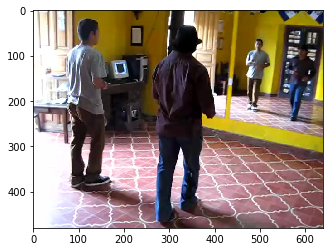

In [37]:
import random

idx = random.randint(0, len(res))
# idx = 329
print('idx:', idx)
print(res[idx].keys())
print(res[idx]['orig_video_idx'][0])

print(res[idx]['gt_boxes'])

img_path = 'slowfast/datasets/vidor/frames/' + res[idx]['orig_video_idx'][0] + '.jpg'
print(img_path)

img = plt.imread(img_path)
plt.imshow(img)
plt.show()

proposal_scores [1.0, 1.0]
proposal_scores [1.0, 1.0]


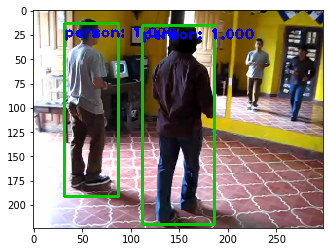

In [38]:
import cv2
import numpy as np
import math
# from slowfast.datasets.cv2_transform import scale

def scale(size, image):
    """
    Scale the short side of the image to size.
    Args:
        size (int): size to scale the image.
        image (array): image to perform short side scale. Dimension is
            `height` x `width` x `channel`.
    Returns:
        (ndarray): the scaled image with dimension of
            `height` x `width` x `channel`.
    """
    height = image.shape[0]
    width = image.shape[1]
    if (width <= height and width == size) or (
        height <= width and height == size
    ):
        return image
    new_width = size
    new_height = size
    if width < height:
        new_height = int(math.floor((float(height) / width) * size))
    else:
        new_width = int(math.floor((float(width) / height) * size))
    img = cv2.resize(
        image, (new_width, new_height), interpolation=cv2.INTER_LINEAR
    )
    return img

def vis_detections_allclss(im, dets, dets_clss, vidor_clss, thresh=0.5, 
                           proposal_scores=None, sub_obj_pair=False, pred_cls=-1):
    """Visual debugging of detections."""
    for i in range(len(dets)):
        bbox = tuple(int(np.round(x)) for x in dets[i])
        class_name = vidor_clss[int(dets_clss[i])]
        if sub_obj_pair: # if evaluating on HOI pair
            class_name = class_name + '_s' if i == 0 else class_name + '_o'
        
        if proposal_scores is not None:
            print('proposal_scores', proposal_scores)
            score = proposal_scores[i]
            if score > thresh:
#                 print(bbox)
                cv2.rectangle(im, bbox[0:2], bbox[2:4], (0, 204, 0), 2)
#                 print(class_name, bbox, score)
                cv2.putText(im, '%s: %.3f' % (class_name, score), (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                            1.0, (0, 0, 255), thickness=2)
        else:
            cv2.rectangle(im, bbox[0:2], bbox[2:4], (0, 204, 0), 2)
#             print(class_name, bbox)
            cv2.putText(im, '%s' % (class_name), (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                        1.0, (0, 0, 255), thickness=2)
    
    if pred_cls != -1:
        pred_name = idx_to_pred[pred_cls]
        box1_x1y1 = list(int(np.round(x)) for x in dets[0])[:2]
        box2_x1y1 = list(int(np.round(x)) for x in dets[1])[:2]
        box1_box2_mid = (np.array(box1_x1y1) + np.array(box2_x1y1)) / 2
        box1_box2_mid = tuple(int(np.round(x)) for x in box1_box2_mid)

        cv2.line(im, tuple(box1_x1y1), tuple(box2_x1y1), (255, 0, 0), 2)
        cv2.putText(im, pred_name, box1_box2_mid, cv2.FONT_HERSHEY_PLAIN,
                            1.0, (0, 0, 255), thickness=2)
#         cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)

    return im

vidor_classes = list(idx_to_obj.values())

# img = cv2.resize(img, (224,224))
img_vis = scale(224, img)

# visualize gt boxes
# img_vis = vis_detections_allclss(img, res[idx]['gt_boxes'], res[idx]['gt_obj_classes'], vidor_classes)

# visualize proposal boxes (same as gt boxes when in ORACLE model)
img_vis = vis_detections_allclss(img_vis, [x[1:] for x in res[idx]['proposal_boxes']], [x[1] for x in res[idx]['proposal_classes']], vidor_classes, 0.2, proposal_scores=[x[1] for x in res[idx]['proposal_scores']])

# Can use all other result file as idx remains in the same order
# img_vis = vis_detections_allclss(img_vis, [x[1:] for x in all_results[idx]['proposal_boxes']], [x[1] for x in all_results[idx]['proposal_classes']], vidor_classes, 0.2, proposal_scores=[x[1] for x in all_results[idx]['proposal_scores']])

plt.imshow(img_vis)
plt.show()

In [39]:
def vis_hoi(img_idx, sub_cls, pred_cls, obj_cls, gt_sub_box, gt_obj_box):
    # img_path = 'slowfast/datasets/vidor/frames/' + res[img_idx]['orig_video_idx'][0] + '.jpg'
    new_idx = f"{int(res[img_idx]['orig_video_idx'][0].split('_')[-1])-15:06d}"
    frame_name = f"{res[img_idx]['orig_video_idx'][0].split('_')[0] + '_' + new_idx}"
    img_path = f"slowfast/datasets/vidor/frames/{frame_name}.jpg"
    
    img = plt.imread(img_path)
    img = scale(224, img)
    img = vis_detections_allclss(img, [gt_sub_box, gt_obj_box], [sub_cls, obj_cls], vidor_classes, sub_obj_pair=True, pred_cls=pred_cls)
    return img, '/'.join([frame_name.split('/')[0], frame_name.split('/')[2]]) # frame_name # '/'.join(frame_name.split('/')[:-1])

In [40]:
idx = 0
for key in all_results[idx].keys():
    print(f'shape of {key}: {len(all_results[idx][key])}')

shape of preds_score: 4
shape of preds: 4
shape of preds_bbox_pair_ids: 4
shape of proposal_scores: 5
shape of proposal_boxes: 5
shape of proposal_classes: 5
shape of gt_boxes: 2
shape of gt_action_labels: 1
shape of gt_obj_classes: 2
shape of gt_bbox_pair_ids: 1


In [41]:
def bbox_iou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [66]:
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

tp, fp, scores, sum_gt = {}, {}, {}, {}

# Construct dictionaries of triplet class 
for result in tqdm(all_results):
    bbox_pair_ids = result['gt_bbox_pair_ids']
    
    for idx, action_label in enumerate(result['gt_action_labels']):
        # action_label != 0.0
        action_label_idxs = [i for i in range(50) if action_label[i] == 1.0]
        for action_label_idx in action_label_idxs:
            if only_evaluate_temporal_predicates and action_label_idx not in temporal_predicates_idx:
                continue
            
            subject_label_idx = 0 # person idx = 0
            object_label_idx = int(result['gt_obj_classes'][bbox_pair_ids[idx][1]][1])
            triplet_class = (subject_label_idx, action_label_idx, object_label_idx)
            
            if triplet_class not in tp: # should also not exist in fp, scores & sum_gt
                tp[triplet_class] = []
                fp[triplet_class] = []
                scores[triplet_class] = []
                sum_gt[triplet_class] = 0
            sum_gt[triplet_class] += 1
            
# delete triplet classes that have less than 25 instances
if delete_less_than_25_instances or delete_more_than_25_instances:
    triplet_classes_to_delete = []
    for triplet_class, count in sum_gt.items():
        if delete_less_than_25_instances and count < 25 or delete_more_than_25_instances and count >= 25:
            triplet_classes_to_delete.append(triplet_class)
    for triplet_class in triplet_classes_to_delete:
        del tp[triplet_class], fp[triplet_class], scores[triplet_class], sum_gt[triplet_class]

# Collect true positive, false positive & scores
import math
correct_det_count = correct_hoi_count = total_det_count = 0
at_least_one_pair_bbox_detected_count = total_count = 0

for img_idx, result in enumerate(tqdm(all_results)): # for each keyframe
    if is_demo:
        new_idx = f"{int(res[img_idx]['orig_video_idx'][0].split('_')[-1])-15:06d}"
        frame_name = f"{res[img_idx]['orig_video_idx'][0].split('_')[0] + '_' + new_idx}"
        frame_name = '/'.join([frame_name.split('/')[0], frame_name.split('/')[2]])
        video_name = frame_name.split('_')[0]
        
        if only_demo_specific_videos and video_name not in to_demo_video_names:
            continue
        if only_demo_specific_frames and frame_name not in to_demo_frame_names:
            continue
#         print(f'Demoing {idx} / {len(all_results)} frame...')
    preds_bbox_pair_ids = result['preds_bbox_pair_ids']
    gt_bbox_pair_ids = result['gt_bbox_pair_ids']
    gt_bbox_pair_matched = set()
    
    # take only top 100 confident triplets
#     preds_scores = [
#         (math.log(result['preds_score'][i][j]) + \
#          math.log(result['proposal_scores'][preds_bbox_pair_ids[i][0]][1]) + \
#          math.log(result['proposal_scores'][preds_bbox_pair_ids[i][1]][1]), i, j) 
#         for i in range(len(result['preds_score'])) for j in range(len(result['preds_score'][i]))
#     ]
    preds_scores = [
        (math.log(result['preds_score'][i][j] if result['preds_score'][i][j] > 0 else 1e-300) + \
        math.log(result['proposal_scores'][preds_bbox_pair_ids[i][0]][1] if result['proposal_scores'][preds_bbox_pair_ids[i][0]][1] > 0 else 1e-300) + \
        math.log(result['proposal_scores'][preds_bbox_pair_ids[i][1]][1] if result['proposal_scores'][preds_bbox_pair_ids[i][1]][1] > 0 else 1e-300), i, j) 
        for i in range(len(result['preds_score'])) for j in range(len(result['preds_score'][i]))
    ]
    preds_scores.sort(reverse=True)
    preds_scores = preds_scores[:10] if is_demo_top_10 else preds_scores[:100]
    
    at_least_one_pair_bbox_detected = False
    
    for score, i, j in preds_scores: # for each HOI prediction, i-th pair and j-th action
        pred_sub_cls = int(result['proposal_classes'][preds_bbox_pair_ids[i][0]][1])
        pred_obj_cls = int(result['proposal_classes'][preds_bbox_pair_ids[i][1]][1])
        pred_rel_cls = j
        
        triplet_class = (pred_sub_cls, pred_rel_cls, pred_obj_cls)
        if triplet_class not in tp:
            continue
        
        pred_sub_box = result['proposal_boxes'][preds_bbox_pair_ids[i][0]][1:]
        pred_obj_box = result['proposal_boxes'][preds_bbox_pair_ids[i][1]][1:]
        is_match = False
        max_ov = max_gt_id = 0
        for k, gt_bbox_pair_id in enumerate(gt_bbox_pair_ids):  # for each ground truth HOI
            gt_sub_cls = int(result['gt_obj_classes'][gt_bbox_pair_id[0]][1])
            gt_obj_cls = int(result['gt_obj_classes'][gt_bbox_pair_id[1]][1])
            gt_rel_cls = result['gt_action_labels'][k][j]
            
            gt_sub_box = result['gt_boxes'][gt_bbox_pair_id[0]][1:]
            gt_obj_box = result['gt_boxes'][gt_bbox_pair_id[1]][1:]
            sub_ov = bbox_iou(gt_sub_box, pred_sub_box)
            obj_ov = bbox_iou(gt_obj_box, pred_obj_box)
            
            # import pdb; pdb.set_trace()
            
            if gt_sub_cls == pred_sub_cls and gt_obj_cls == pred_obj_cls and sub_ov >= 0.5 and obj_ov >= 0.5:
                correct_det_count += 1
                if not at_least_one_pair_bbox_detected:
                    at_least_one_pair_bbox_detected = True
                    at_least_one_pair_bbox_detected_count += 1
                          
                if gt_rel_cls == 1.0:
                    if is_demo: #  and not is_demo_incorrect_hois:
#                         print(f'Image idx: {img_idx}. Correct tripet: {idx_to_obj[pred_sub_cls]}, {idx_to_pred[j]}, {idx_to_obj[pred_obj_cls]}')

                        sub_cls = idx_to_obj[pred_sub_cls].replace('/', 'or') + str(preds_bbox_pair_ids[i][0])
                        pred_cls = idx_to_pred[j]
                        obj_cls = idx_to_obj[pred_obj_cls].replace('/', 'or') + str(preds_bbox_pair_ids[i][1])
            
#                         new_idx = f"{int(res[img_idx]['orig_video_idx'][0].split('_')[-1])-15:06d}"
#                         frame_name = f"{res[img_idx]['orig_video_idx'][0].split('_')[0] + '_' + new_idx}"
#                         frame_name = '/'.join([frame_name.split('/')[0], frame_name.split('/')[2]])
                        
                        save_dir = f'demo/{demo_vis_name}/{frame_name.split("/")[0]}'
                        save_path = f'demo/{demo_vis_name}/{frame_name}' + '_' + f'{score:.2f}_{sub_cls}-{pred_cls}-{obj_cls}.jpg'
                        
                        if (is_demo_save_imgs and not os.path.exists(save_path)) or is_demo_show_imgs:
                            img_vis, _ = vis_hoi(img_idx, pred_sub_cls, j, pred_obj_cls, gt_sub_box, gt_obj_box)
                            plt.imshow(img_vis)
                            plt.axis('off')
                            if is_demo_save_imgs and not os.path.exists(save_path):
#                                 print('frame_name:', frame_name)
#                                 print('save_dir:', save_dir)
#                                 print('save_path:', save_path)

                                if not os.path.isdir(save_dir):
                                    os.makedirs(save_dir)

                                plt.savefig(save_path, bbox_inches='tight')
                            if is_demo_show_imgs:
                                print('save_path:', save_path)
                                plt.show() # (Optional) Show the figure. THIS SHOULD COME AFTER plt.savefig
                        
                    is_match = True
                    correct_hoi_count += 1
                    min_ov_cur = min(sub_ov, obj_ov)
                    if min_ov_cur > max_ov:
                        max_ov = min_ov_cur
                        max_gt_id = k
#                     print(f'a pair of bbox correctly localized and detected predicate is correct!')
#                     print(f'Current correct HOI/correct detection ratio: {correct_hoi_count/correct_det_count:5f}')
                else: # Wrong predicate 
                    if is_demo and is_demo_incorrect_hois: # is_demo_incorrect_hois is True
#                         print(f'Wrong tripet: {idx_to_obj[pred_sub_cls]}, {idx_to_pred[j]}, {idx_to_obj[pred_obj_cls]}')
                        
                        sub_cls = idx_to_obj[pred_sub_cls].replace('/', 'or') + str(preds_bbox_pair_ids[i][0])
                        pred_cls = idx_to_pred[j]
                        obj_cls = idx_to_obj[pred_obj_cls].replace('/', 'or') + str(preds_bbox_pair_ids[i][1])
                
#                         new_idx = f"{int(res[img_idx]['orig_video_idx'][0].split('_')[-1])-15:06d}"
#                         frame_name = f"{res[img_idx]['orig_video_idx'][0].split('_')[0] + '_' + new_idx}"
#                         frame_name = '/'.join([frame_name.split('/')[0], frame_name.split('/')[2]])
                        
                        save_dir = f'demo/{demo_vis_name}_wrong/{frame_name.split("/")[0]}'
                        save_path = f'demo/{demo_vis_name}_wrong/{frame_name}' + '_' + f'{score:.2f}_{sub_cls}-{pred_cls}-{obj_cls}.jpg'
                            
                        if (is_demo_save_imgs and not os.path.exists(save_path)) or is_demo_show_imgs:
                            img_vis, _ = vis_hoi(img_idx, pred_sub_cls, j, pred_obj_cls, gt_sub_box, gt_obj_box)
                            plt.imshow(img_vis)
                            plt.axis('off')
                            if is_demo_save_imgs and not os.path.exists(save_path):
                                if not os.path.isdir(save_dir):
                                    os.makedirs(save_dir)

                                plt.savefig(save_path, bbox_inches='tight')
                            if is_demo_show_imgs:
                                print('save_path:', save_path)
                                plt.show() # (Optional) Show the figure. THIS SHOULD COME AFTER plt.savefig
                            
#                     print(f'a pair of bbox correctly localized and detected but predicate is not correct!')
#                     print(f'Current correct HOI/correct detection ratio: {correct_hoi_count/correct_det_count:5f}')
            total_det_count += 1
            # print(f'Current detection/total detection ratio: {correct_det_count/total_det_count:5f}')
        
        if is_match and max_gt_id not in gt_bbox_pair_matched:
            tp[triplet_class].append(1)
            fp[triplet_class].append(0)
            gt_bbox_pair_matched.add(max_gt_id)
        else:
            tp[triplet_class].append(0)
            fp[triplet_class].append(1)
        scores[triplet_class].append(score)
    total_count += 1
#     print(f'Current at_least_one_pair_bbox_detected ratio: {at_least_one_pair_bbox_detected_count} / {total_count} = {at_least_one_pair_bbox_detected_count/total_count:5f}')

print(f'[Final] correct HOI/correct detection ratio: {correct_hoi_count/correct_det_count:5f}')
print(f'[Final] correct detection/total detection ratio: {correct_det_count/total_det_count:5f}')
print(f'[Final] at_least_one_pair_bbox_detected ratio: {at_least_one_pair_bbox_detected_count} / {total_count} = {at_least_one_pair_bbox_detected_count/total_count:5f}')
    
# for result in all_results:
#     bbox_pair_ids = result['bbox_pair_ids']
#     import pdb; pdb.set_trace()
# #     result['preds_score']
    
#     for idx, score in enumerate(result['preds_score']):
#         pass
        
# print('tp:', tp)
# print('fp:', fp)
# print('scores:', scores)

100%|██████████| 21758/21758 [00:36<00:00, 589.39it/s]

[Final] correct HOI/correct detection ratio: 0.007967
[Final] correct detection/total detection ratio: 0.094499
[Final] at_least_one_pair_bbox_detected ratio: 10254 / 21758 = 0.471275


In [67]:
# Compute mAP
import numpy as np

def voc_ap(rec, prec):
    ap = 0.
    for t in np.arange(0., 1.1, 0.1):
        if np.sum(rec >= t) == 0:
            p = 0
        else:
            p = np.max(prec[rec >= t])
        ap = ap + p / 11.
    return ap

ap = np.zeros(len(tp))
max_recall = np.zeros(len(tp))

for i, triplet_class in tqdm(enumerate(tp.keys())):
    sum_gt_temp = sum_gt[triplet_class]

    if sum_gt_temp == 0:
        continue
    tp_temp = np.asarray((tp[triplet_class]).copy())
    fp_temp = np.asarray((fp[triplet_class]).copy())
    res_num = len(tp_temp)
    if res_num == 0:
        continue
    scores_temp = np.asarray(scores[triplet_class].copy())
    sort_inds = np.argsort(-scores_temp) # sort decreasingly

    fp_temp = fp_temp[sort_inds]
    tp_temp = tp_temp[sort_inds]

    fp_temp = np.cumsum(fp_temp) 
    tp_temp = np.cumsum(tp_temp)

    rec = tp_temp / sum_gt_temp # recall
    prec = tp_temp / (fp_temp + tp_temp) # precision

    ap[i] = voc_ap(rec, prec)
    max_recall[i] = np.max(rec)

mAP = np.mean(ap[:])
m_rec = np.mean(max_recall[:])

print('------------------------------------------')
print('mAP: {:.5f} max recall: {:.5f}'.format(mAP, m_rec))
print('------------------------------------------')

312it [00:00, 3951.61it/s]

------------------------------------------
mAP: 0.02094 max recall: 0.13703
------------------------------------------


In [17]:
# tp_counts = [len(value) for value in tp.values()]
tp_counts = []
total_count = 0
for value in tp.values():
    total_count += len(value)
    tp_counts.append(len(value))
tp_count_ratio = [count/total_count for count in tp_counts]

tp_keys = list(tp.keys())
unsorted_maps = []
for idx, classAP in enumerate(ap):
    s, p, o = tp_keys[idx]
    count = tp_counts[idx]
    count_ratio = tp_count_ratio[idx]
    unsorted_maps.append((classAP, (s, p, o), count, count_ratio))
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP}, count = {count} ({count_ratio*100:.3f}%)')

(person, next_to, screen/monitor): mAP = 0.05334675206679852, count = 9116 (0.522%)
(person, towards, screen/monitor): mAP = 0.00077416500774165, count = 2534 (0.145%)
(person, point_to, screen/monitor): mAP = 0.0, count = 748 (0.043%)
(person, in_front_of, person): mAP = 0.18348969155450878, count = 226650 (12.984%)
(person, watch, person): mAP = 0.04090909090909091, count = 107092 (6.135%)
(person, next_to, person): mAP = 0.2866096220495521, count = 237779 (13.622%)
(person, watch, tiger): mAP = 0.0, count = 53 (0.003%)
(person, in_front_of, tiger): mAP = 0.1515151515151515, count = 55 (0.003%)
(person, behind, person): mAP = 0.02748526900859433, count = 120238 (6.888%)
(person, lean_on, sofa): mAP = 0.3199503016468455, count = 5951 (0.341%)
(person, above, sofa): mAP = 0.028224716460010575, count = 5121 (0.293%)
(person, hug, person): mAP = 0.004248088360237893, count = 34100 (1.953%)
(person, speak_to, person): mAP = 0.0, count = 26149 (1.498%)
(person, hold_hand_of, person): mAP =

In [18]:
# Sorted by mAP
sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx == 30:
        print('--')
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, behind, suitcase): mAP = 1.00000, count = 339 (0.019%)
(person, in_front_of, watercraft): mAP = 0.82727, count = 687 (0.039%)
(person, in_front_of, penguin): mAP = 0.64935, count = 142 (0.008%)
(person, lean_on, baby_walker): mAP = 0.53086, count = 1510 (0.087%)
(person, in_front_of, screen/monitor): mAP = 0.44398, count = 10520 (0.603%)
(person, next_to, bird): mAP = 0.44364, count = 253 (0.014%)
(person, behind, penguin): mAP = 0.42133, count = 126 (0.007%)
(person, in_front_of, laptop): mAP = 0.37200, count = 2119 (0.121%)
(person, in_front_of, antelope): mAP = 0.36364, count = 3 (0.000%)
(person, above, horse): mAP = 0.35253, count = 532 (0.030%)
(person, lean_on, sofa): mAP = 0.31995, count = 5951 (0.341%)
(person, above, stool): mAP = 0.31550, count = 509 (0.029%)
(person, above, motorcycle): mAP = 0.30653, count = 191 (0.011%)
(person, play(instrument), guitar): mAP = 0.29659, count = 2077 (0.119%)
(person, next_to, person): mAP = 0.28661, count = 237779 (13.622%)
(pers

In [19]:
# Sorted by mAP and view only "hug"
# sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] != 'hug':
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, hug, dog): mAP = 0.27273, count = 1280 (0.073%)
(person, hug, person): mAP = 0.00425, count = 34100 (1.953%)
(person, hug, cat): mAP = 0.00152, count = 476 (0.027%)
(person, hug, vegetables): mAP = 0.00000, count = 27 (0.002%)
(person, hug, ball/sports_ball): mAP = 0.00000, count = 615 (0.035%)
(person, hug, toy): mAP = 0.00000, count = 4336 (0.248%)
(person, hug, guitar): mAP = 0.00000, count = 836 (0.048%)


In [20]:
# Sorted by mAP and view only "lean_on"
# sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] != 'lean_on':
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, lean_on, baby_walker): mAP = 0.53086, count = 1510 (0.087%)
(person, lean_on, sofa): mAP = 0.31995, count = 5951 (0.341%)
(person, lean_on, baby_seat): mAP = 0.27140, count = 3038 (0.174%)
(person, lean_on, toy): mAP = 0.21808, count = 5060 (0.290%)
(person, lean_on, chair): mAP = 0.05682, count = 1630 (0.093%)
(person, lean_on, sink): mAP = 0.04545, count = 73 (0.004%)
(person, lean_on, person): mAP = 0.00160, count = 52568 (3.011%)
(person, lean_on, table): mAP = 0.00143, count = 6272 (0.359%)
(person, lean_on, bicycle): mAP = 0.00010, count = 1856 (0.106%)
(person, lean_on, stool): mAP = 0.00000, count = 339 (0.019%)
(person, lean_on, bus/truck): mAP = 0.00000, count = 112 (0.006%)
(person, lean_on, bench): mAP = 0.00000, count = 18 (0.001%)
(person, lean_on, ball/sports_ball): mAP = 0.00000, count = 513 (0.029%)
(person, lean_on, car): mAP = 0.00000, count = 824 (0.047%)


In [21]:
# Sorted by mAP and view only "ride"
# sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] != 'ride':
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, ride, watercraft): mAP = 0.03030, count = 347 (0.020%)
(person, ride, ski): mAP = 0.01515, count = 181 (0.010%)
(person, ride, horse): mAP = 0.00909, count = 326 (0.019%)
(person, ride, bicycle): mAP = 0.00649, count = 1463 (0.084%)
(person, ride, car): mAP = 0.00607, count = 413 (0.024%)
(person, ride, train): mAP = 0.00455, count = 37 (0.002%)
(person, ride, toy): mAP = 0.00256, count = 1874 (0.107%)
(person, ride, baby_seat): mAP = 0.00154, count = 850 (0.049%)
(person, ride, cattle/cow): mAP = 0.00000, count = 0 (0.000%)
(person, ride, scooter): mAP = 0.00000, count = 25 (0.001%)
(person, ride, elephant): mAP = 0.00000, count = 12 (0.001%)
(person, ride, bus/truck): mAP = 0.00000, count = 86 (0.005%)
(person, ride, skateboard): mAP = 0.00000, count = 0 (0.000%)
(person, ride, snowboard): mAP = 0.00000, count = 68 (0.004%)
(person, ride, surfboard): mAP = 0.00000, count = 74 (0.004%)
(person, ride, motorcycle): mAP = 0.00000, count = 150 (0.009%)


In [22]:
# Sorted by mAP and view only "towards"
# sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] != 'towards':
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, towards, sofa): mAP = 0.09161, count = 2370 (0.136%)
(person, towards, toy): mAP = 0.09091, count = 3946 (0.226%)
(person, towards, stool): mAP = 0.07273, count = 316 (0.018%)
(person, towards, car): mAP = 0.01884, count = 950 (0.054%)
(person, towards, person): mAP = 0.01748, count = 30988 (1.775%)
(person, towards, dog): mAP = 0.01299, count = 1825 (0.105%)
(person, towards, chair): mAP = 0.00649, count = 1831 (0.105%)
(person, towards, bicycle): mAP = 0.00154, count = 1329 (0.076%)
(person, towards, cup): mAP = 0.00144, count = 1039 (0.060%)
(person, towards, ball/sports_ball): mAP = 0.00099, count = 889 (0.051%)
(person, towards, screen/monitor): mAP = 0.00077, count = 2534 (0.145%)
(person, towards, guitar): mAP = 0.00011, count = 1447 (0.083%)
(person, towards, traffic_light): mAP = 0.00000, count = 0 (0.000%)
(person, towards, sink): mAP = 0.00000, count = 38 (0.002%)
(person, towards, stop_sign): mAP = 0.00000, count = 0 (0.000%)
(person, towards, faucet): mAP = 0.0000

In [23]:
# Sorted by mAP and view only "hug"
# sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] != 'hug':
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, hug, dog): mAP = 0.27273, count = 1280 (0.073%)
(person, hug, person): mAP = 0.00425, count = 34100 (1.953%)
(person, hug, cat): mAP = 0.00152, count = 476 (0.027%)
(person, hug, vegetables): mAP = 0.00000, count = 27 (0.002%)
(person, hug, ball/sports_ball): mAP = 0.00000, count = 615 (0.035%)
(person, hug, toy): mAP = 0.00000, count = 4336 (0.248%)
(person, hug, guitar): mAP = 0.00000, count = 836 (0.048%)


In [24]:
# Sorted by mAP and view only "away"
# sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] != 'away':
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, away, car): mAP = 0.10250, count = 1018 (0.058%)
(person, away, person): mAP = 0.09091, count = 33817 (1.937%)
(person, away, motorcycle): mAP = 0.04545, count = 182 (0.010%)
(person, away, chair): mAP = 0.04545, count = 2221 (0.127%)
(person, away, stool): mAP = 0.03791, count = 359 (0.021%)
(person, away, dog): mAP = 0.02273, count = 1874 (0.107%)
(person, away, camera): mAP = 0.01515, count = 100 (0.006%)
(person, away, bicycle): mAP = 0.01489, count = 1336 (0.077%)
(person, away, piano): mAP = 0.01070, count = 132 (0.008%)
(person, away, cup): mAP = 0.00699, count = 1199 (0.069%)
(person, away, table): mAP = 0.00568, count = 2632 (0.151%)
(person, away, ski): mAP = 0.00455, count = 163 (0.009%)
(person, away, train): mAP = 0.00284, count = 111 (0.006%)
(person, away, sofa): mAP = 0.00260, count = 2332 (0.134%)
(person, away, toy): mAP = 0.00186, count = 4020 (0.230%)
(person, away, ball/sports_ball): mAP = 0.00159, count = 1037 (0.059%)
(person, away, screen/monitor): mAP 

In [25]:
# Sorted by mAP and view only "play(instrument)"
# sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] != 'play(instrument)':
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, play(instrument), guitar): mAP = 0.29659, count = 2077 (0.119%)
(person, play(instrument), piano): mAP = 0.00000, count = 84 (0.005%)


In [26]:
# Sorted by mAP and view only "push"
# sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] != 'push':
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, push, dish): mAP = 0.00000, count = 142 (0.008%)
(person, push, baby_walker): mAP = 0.00000, count = 71 (0.004%)
(person, push, dog): mAP = 0.00000, count = 930 (0.053%)
(person, push, bicycle): mAP = 0.00000, count = 743 (0.043%)
(person, push, ball/sports_ball): mAP = 0.00000, count = 323 (0.019%)
(person, push, baby_seat): mAP = 0.00000, count = 468 (0.027%)
(person, push, toy): mAP = 0.00000, count = 1546 (0.089%)
(person, push, chair): mAP = 0.00000, count = 511 (0.029%)
(person, push, person): mAP = 0.00000, count = 10747 (0.616%)


In [27]:
# Sorted by mAP and view only "pull"
# sorted_maps = sorted(unsorted_maps, reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] != 'pull':
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, pull, horse): mAP = 0.00000, count = 179 (0.010%)
(person, pull, dish): mAP = 0.00000, count = 93 (0.005%)
(person, pull, baby_walker): mAP = 0.00000, count = 54 (0.003%)
(person, pull, suitcase): mAP = 0.00000, count = 1 (0.000%)
(person, pull, ski): mAP = 0.00000, count = 64 (0.004%)
(person, pull, dog): mAP = 0.00000, count = 808 (0.046%)
(person, pull, motorcycle): mAP = 0.00000, count = 70 (0.004%)
(person, pull, toy): mAP = 0.00000, count = 1182 (0.068%)
(person, pull, chair): mAP = 0.00000, count = 355 (0.020%)
(person, pull, person): mAP = 0.00000, count = 7916 (0.453%)


In [28]:
# Sorted by nb of occurrence
sorted_maps_by_count = sorted(unsorted_maps, key=lambda val:val[3], reverse=True)
for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps_by_count):
    if idx == 30:
        print('--')
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

(person, next_to, person): mAP = 0.28661, count = 237779 (13.622%)
(person, in_front_of, person): mAP = 0.18349, count = 226650 (12.984%)
(person, behind, person): mAP = 0.02749, count = 120238 (6.888%)
(person, watch, person): mAP = 0.04091, count = 107092 (6.135%)
(person, lean_on, person): mAP = 0.00160, count = 52568 (3.011%)
(person, above, person): mAP = 0.00028, count = 47007 (2.693%)
(person, hug, person): mAP = 0.00425, count = 34100 (1.953%)
(person, away, person): mAP = 0.09091, count = 33817 (1.937%)
(person, hold, person): mAP = 0.00028, count = 32938 (1.887%)
(person, towards, person): mAP = 0.01748, count = 30988 (1.775%)
(person, speak_to, person): mAP = 0.00000, count = 26149 (1.498%)
(person, inside, person): mAP = 0.00000, count = 23661 (1.355%)
(person, hold_hand_of, person): mAP = 0.00003, count = 21543 (1.234%)
(person, next_to, table): mAP = 0.27014, count = 17485 (1.002%)
(person, next_to, toy): mAP = 0.12077, count = 17121 (0.981%)
(person, caress, person): mAP

In [103]:
from collections import defaultdict
pred_APs = defaultdict(list)
pred_count = defaultdict(int)
total_count = 0
for classAP, (s, p, o), count, count_ratio in unsorted_maps:
    pred_APs[p].append(classAP)
    pred_count[p] += count
    total_count += count
    
print('-- Predicate-wise mean AP --')
pred_mean_APs = {}
for idx, (p, APs) in enumerate(pred_APs.items()):
#     if idx == 17:
#         print('--')
    print(f'{idx_to_pred[p]}: {sum(APs)/len(APs):5f} ({pred_count[p]*100/total_count:5f}%)')
    pred_mean_APs[idx_to_pred[p]] = sum(APs)/len(APs)
    
print(len(pred_mean_APs))

-- Predicate-wise mean AP --
next_to: 0.608925 (10.621504%)
towards: 0.073444 (5.989976%)
point_to: 0.018741 (1.339396%)
in_front_of: 0.400805 (10.430193%)
watch: 0.131691 (8.228991%)
behind: 0.202858 (8.764025%)
lean_on: 0.276777 (3.037799%)
above: 0.459127 (3.381015%)
hug: 0.083723 (1.963965%)
speak_to: 0.000000 (2.263934%)
hold_hand_of: 0.000082 (1.730711%)
pull: 0.069446 (1.738679%)
press: 0.000174 (1.812495%)
away: 0.118901 (5.955495%)
hold: 0.022500 (3.028020%)
use: 0.007499 (0.061066%)
inside: 0.139079 (1.371269%)
push: 0.002252 (1.919052%)
play(instrument): 0.323125 (0.202612%)
ride: 0.193999 (0.470563%)
carry: 0.011869 (1.455878%)
caress: 0.015169 (1.329979%)
grab: 0.000003 (1.259206%)
lift: 0.005693 (1.261814%)
touch: 0.024523 (1.892685%)
chase: 0.000035 (0.943807%)
pat: 0.000016 (1.480507%)
wave: 0.000000 (1.245153%)
beneath: 0.156812 (1.924413%)
release: 0.000000 (1.409444%)
kiss: 0.000000 (0.882741%)
feed: 0.000000 (1.330703%)
throw: 0.026605 (0.207103%)
drive: 0.000874 (0

In [104]:
# (person, away, person)
# (person, towards, person)
# (person, lift, ball/sports_ball)
# (person, push, baby_walker)
# (person, pull, baby_walker)
# (person, hug, person)
# (person, lean_on, person)

for idx, (classAP, (s, p, o), count, count_ratio) in enumerate(sorted_maps):
    if idx_to_pred[p] == 'away' and idx_to_obj[o] == 'person':
        person_away_person = classAP
    elif idx_to_pred[p] == 'towards' and idx_to_obj[o] == 'person':
        person_towards_person = classAP
    elif idx_to_pred[p] == 'lift' and idx_to_obj[o] == 'ball/sports_ball':
        person_lift_ball_sports_ball = classAP
    elif idx_to_pred[p] == 'push' and idx_to_obj[o] == 'baby_walker':
        person_push_baby_walker = classAP
    elif idx_to_pred[p] == 'pull' and idx_to_obj[o] == 'baby_walker':
        person_pull_baby_walker = classAP
    elif idx_to_pred[p] == 'hug' and idx_to_obj[o] == 'person':
        person_hug_person = classAP
    elif idx_to_pred[p] == 'lean_on' and idx_to_obj[o] == 'person':
        person_lean_on_person = classAP
    else:
        continue
    print(f'({idx_to_obj[s]}, {idx_to_pred[p]}, {idx_to_obj[o]}): mAP = {classAP:.5f}, count = {count} ({count_ratio*100:.3f}%)')

example_mAPs = [
    person_away_person, 
    person_towards_person, 
    person_lift_ball_sports_ball, 
    person_push_baby_walker, 
    person_pull_baby_walker, 
    person_hug_person,
    person_lean_on_person,
]

(person, pull, baby_walker): mAP = 0.69445, count = 185 (0.013%)
(person, lean_on, person): mAP = 0.20742, count = 25376 (1.838%)
(person, hug, person): mAP = 0.12892, count = 19153 (1.387%)
(person, away, person): mAP = 0.04717, count = 46135 (3.342%)
(person, lift, ball/sports_ball): mAP = 0.04545, count = 585 (0.042%)
(person, towards, person): mAP = 0.04393, count = 46230 (3.349%)
(person, push, baby_walker): mAP = 0.02024, count = 249 (0.018%)


In [105]:
# image_baseline_example_mAPs = example_mAPs
# slowfast_example_mAPs = example_mAPs
# slowfast_trajectory_example_mAPs = example_mAPs
# slowfast_trajectory_toipool_example_mAPs = example_mAPs
# slowfast_trajectory_spatial_example_mAPs = example_mAPs
slowfast_trajectory_toipool_spatial_example_mAPs = example_mAPs

In [110]:
import json

## save essential results for draw the below bar chart ###

bar_chart_examples = {
    "image_baseline_example_mAPs": image_baseline_example_mAPs,
    "slowfast_example_mAPs": slowfast_example_mAPs,
    "slowfast_trajectory_example_mAPs": slowfast_trajectory_example_mAPs,
    "slowfast_trajectory_toipool_example_mAPs": slowfast_trajectory_toipool_example_mAPs,
    "slowfast_trajectory_spatial_example_mAPs": slowfast_trajectory_spatial_example_mAPs,
    "slowfast_trajectory_toipool_spatial_example_mAPs": slowfast_trajectory_toipool_spatial_example_mAPs,
}
with open('slowfast/datasets/vidor/bar_chart_examples.json', 'w') as f:
    json.dump(bar_chart_examples, f)

'''
with open('slowfast/datasets/vidor/bar_chart_examples.json', 'r') as f:
    bar_chart_examples = json.load(f)
image_baseline_example_mAPs = bar_chart_examples['image_baseline_example_mAPs']
slowfast_example_mAPs = bar_chart_examples['slowfast_example_mAPs']
slowfast_trajectory_example_mAPs = bar_chart_examples['slowfast_trajectory_example_mAPs']
slowfast_trajectory_toipool_example_mAPs = bar_chart_examples['slowfast_trajectory_toipool_example_mAPs']
slowfast_trajectory_spatial_example_mAPs = bar_chart_examples['slowfast_trajectory_spatial_example_mAPs']
slowfast_trajectory_toipool_spatial_example_mAPs = bar_chart_examples['slowfast_trajectory_toipool_spatial_example_mAPs']
'''

"\nwith open('slowfast/datasets/vidor/bar_chart_examples.json', 'r') as f:\n    bar_chart_examples = json.load(f)\nimage_baseline_example_mAPs = bar_chart_examples['image_baseline_example_mAPs']\nslowfast_example_mAPs = bar_chart_examples['slowfast_example_mAPs']\nslowfast_trajectory_example_mAPs = bar_chart_examples['slowfast_trajectory_example_mAPs']\nslowfast_trajectory_toipool_example_mAPs = bar_chart_examples['slowfast_trajectory_toipool_example_mAPs']\nslowfast_trajectory_spatial_example_mAPs = bar_chart_examples['slowfast_trajectory_spatial_example_mAPs']\nslowfast_trajectory_toipool_spatial_example_mAPs = bar_chart_examples['slowfast_trajectory_toipool_spatial_example_mAPs']\n"

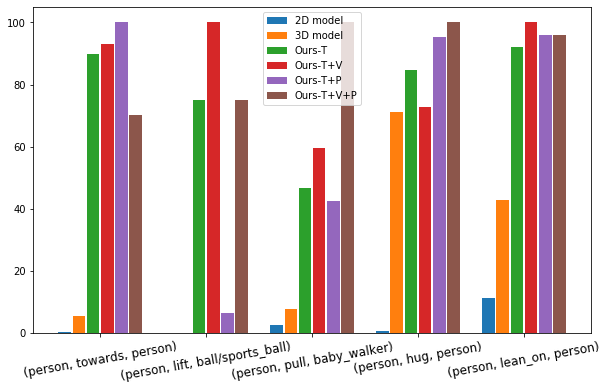

In [157]:
from matplotlib import pyplot as plt
import math

# use_thresh = True # check this!
# if use_thresh:
#     keys = sorted_predicates_threshed
# else:
#     only_show_top = 50 # only show top 30 frequent predicates
#     keys = sorted_predicates[:only_show_top]
keys = [
    '(person, away, person)',
    '(person, towards, person)',
    '(person, lift, ball/sports_ball)',
    '(person, push, baby_walker)',
    '(person, pull, baby_walker)',
    '(person, hug, person)',
    '(person, lean_on, person)',
]
key_idxs_to_be_excluded = [0, 3]

### Display Options ###
normalize_to_baseline = False
normalize_to_max = True
assert not (normalize_to_baseline and normalize_to_max) # only can turn on one normalization

if normalize_to_baseline:
    slowfast_example_mAPs_new = [slowfast_example_mAPs[i] / image_baseline_example_mAPs[i] for i in range(len(keys))]
    slowfast_trajectory_example_mAPs_new = [slowfast_trajectory_example_mAPs[i] / image_baseline_example_mAPs[i] for i in range(len(keys))]
    slowfast_trajectory_toipool_example_mAPs_new = [slowfast_trajectory_toipool_example_mAPs[i] / image_baseline_example_mAPs[i] for i in range(len(keys))]
    slowfast_trajectory_spatial_example_mAPs_new = [slowfast_trajectory_spatial_example_mAPs[i] / image_baseline_example_mAPs[i] for i in range(len(keys))]
    slowfast_trajectory_toipool_spatial_example_mAPs_new = [slowfast_trajectory_toipool_spatial_example_mAPs[i] / image_baseline_example_mAPs[i] for i in range(len(keys))]    
elif normalize_to_max:
    max_list = [
        max([
            image_baseline_example_mAPs[i],
            slowfast_example_mAPs[i], 
            slowfast_trajectory_example_mAPs[i],
            slowfast_trajectory_toipool_example_mAPs[i],
            slowfast_trajectory_spatial_example_mAPs[i],
            slowfast_trajectory_toipool_spatial_example_mAPs[i],
        ]) for i in range(len(keys))
    ]
    slowfast_example_mAPs_new = [slowfast_example_mAPs[i] / max_list[i] for i in range(len(keys))]
    slowfast_trajectory_example_mAPs_new = [slowfast_trajectory_example_mAPs[i] / max_list[i] for i in range(len(keys))]
    slowfast_trajectory_toipool_example_mAPs_new = [slowfast_trajectory_toipool_example_mAPs[i] / max_list[i] for i in range(len(keys))]
    slowfast_trajectory_spatial_example_mAPs_new = [slowfast_trajectory_spatial_example_mAPs[i] / max_list[i] for i in range(len(keys))]
    slowfast_trajectory_toipool_spatial_example_mAPs_new = [slowfast_trajectory_toipool_spatial_example_mAPs[i] / max_list[i] for i in range(len(keys))]
else:
    slowfast_example_mAPs_new = slowfast_example_mAPs
    slowfast_trajectory_example_mAPs_new = slowfast_trajectory_example_mAPs
    slowfast_trajectory_toipool_example_mAPs_new = slowfast_trajectory_toipool_example_mAPs
    slowfast_trajectory_spatial_example_mAPs_new = slowfast_trajectory_spatial_example_mAPs
    slowfast_trajectory_toipool_spatial_example_mAPs_new = slowfast_trajectory_toipool_spatial_example_mAPs
    
log_scale = False # NOTE: Need to be used along with normalize_to_baseline or normalize_to_max!
if log_scale:
    slowfast_example_mAPs_new = [math.log10(slowfast_example_mAPs_new[i]*100) if slowfast_example_mAPs_new[i]*100 >= 10 else 0.0 for i in range(len(keys))]
    slowfast_trajectory_example_mAPs_new = [math.log10(slowfast_trajectory_example_mAPs_new[i]*100) if slowfast_example_mAPs_new[i]*100 >= 10 else 0.0 for i in range(len(keys))]
    slowfast_trajectory_toipool_example_mAPs_new = [math.log10(slowfast_trajectory_toipool_example_mAPs_new[i]*100) if slowfast_example_mAPs_new[i]*100 >= 10 else 0.0 for i in range(len(keys))]
    slowfast_trajectory_spatial_example_mAPs_new = [math.log10(slowfast_trajectory_spatial_example_mAPs_new[i]*100) if slowfast_example_mAPs_new[i]*100 >- 10 else 0.0 for i in range(len(keys))]
    slowfast_trajectory_toipool_spatial_example_mAPs_new = [math.log10(slowfast_trajectory_toipool_spatial_example_mAPs_new[i]*100) if slowfast_example_mAPs_new[i]*100 >- 10 else 0.0 for i in range(len(keys))]

percent_view = True
image_baseline_example_mAPs_new = image_baseline_example_mAPs
if percent_view:
    image_baseline_example_mAPs_new =[image_baseline_example_mAPs_new[i]*100 for i in range(len(keys))]
    slowfast_example_mAPs_new = [slowfast_example_mAPs_new[i]*100 for i in range(len(keys))]
    slowfast_trajectory_example_mAPs_new = [slowfast_trajectory_example_mAPs_new[i]*100 for i in range(len(keys))]
    slowfast_trajectory_toipool_example_mAPs_new = [slowfast_trajectory_toipool_example_mAPs_new[i]*100 for i in range(len(keys))]
    slowfast_trajectory_spatial_example_mAPs_new = [slowfast_trajectory_spatial_example_mAPs_new[i]*100 for i in range(len(keys))]
    slowfast_trajectory_toipool_spatial_example_mAPs_new = [slowfast_trajectory_toipool_spatial_example_mAPs_new[i]*100 for i in range(len(keys))]
### Display Options END ###

data = {
    "2D model": image_baseline_example_mAPs_new,
    "3D model": slowfast_example_mAPs_new,
    "Ours-T": slowfast_trajectory_example_mAPs_new,
    "Ours-T+V": slowfast_trajectory_toipool_example_mAPs_new,
    "Ours-T+P": slowfast_trajectory_spatial_example_mAPs_new,
    "Ours-T+V+P": slowfast_trajectory_toipool_spatial_example_mAPs_new,
}

if key_idxs_to_be_excluded:
    for idx in key_idxs_to_be_excluded[::-1]:
        keys.pop(idx)
        for key in data.keys():
            data[key].pop(idx)

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
fig.set_size_inches(10, 6)
plt.xticks(range(len(keys)), keys)
plt.xticks(rotation=10,fontsize=12)
# plt.title('Temporal-aware HOIs mAPs')
plt.show()

In [525]:
slowfast_example_mAPs_new

[0.05997278880762845,
 0.003367003367003367,
 0.05295780774249673,
 0.0,
 0.013175230566534914]

In [117]:
# predicates = list(pred_mean_APs.keys())

# image_baseline_pred_mean_APs = pred_mean_APs
# slowfast_pred_mean_APs = pred_mean_APs
# slowfast_trajectory_pred_mean_APs = pred_mean_APs
# slowfast_trajectory_spatial_pred_mean_APs = pred_mean_APs
# slowfast_trajectory_toipool_pred_mean_APs = pred_mean_APs
slowfast_trajectory_toipool_spatial_pred_mean_APs = pred_mean_APs

In [120]:
import json

### save essential results for draw the below bar chart ###
data = {
    "image_baseline_pred_mean_APs": image_baseline_pred_mean_APs,
    "slowfast_pred_mean_APs": slowfast_pred_mean_APs,
    "slowfast_trajectory_pred_mean_APs": slowfast_trajectory_pred_mean_APs,
    "slowfast_trajectory_toipool_pred_mean_APs": slowfast_trajectory_toipool_pred_mean_APs,
    "slowfast_trajectory_spatial_pred_mean_APs": slowfast_trajectory_spatial_pred_mean_APs,
    "slowfast_trajectory_toipool_spatial_pred_mean_APs": slowfast_trajectory_toipool_spatial_pred_mean_APs,
}
with open('slowfast/datasets/vidor/bar_chart_data.json', 'w') as f:
    json.dump(data, f)

# with open('slowfast/datasets/vidor/bar_chart_data.json', 'r') as f:
#     data = json.load(f)
# image_baseline_pred_mean_APs = data['image_baseline_pred_mean_APs']
# slowfast_pred_mean_APs = data['slowfast_pred_mean_APs']
# slowfast_trajectory_pred_mean_APs = data['slowfast_trajectory_pred_mean_APs']
# slowfast_trajectory_toipool_pred_mean_APs = data['slowfast_trajectory_toipool_pred_mean_APs']
# slowfast_trajectory_spatial_pred_mean_APs = data['slowfast_trajectory_spatial_pred_mean_APs']
# slowfast_trajectory_toipool_spatial_pred_mean_APs = data['slowfast_trajectory_toipool_spatial_pred_mean_APs']

In [119]:
assert image_baseline_pred_mean_APs.keys() == slowfast_pred_mean_APs.keys() == slowfast_trajectory_pred_mean_APs.keys() == slowfast_trajectory_spatial_pred_mean_APs.keys() == slowfast_trajectory_toipool_pred_mean_APs.keys() == slowfast_trajectory_toipool_spatial_pred_mean_APs.keys()
# print(image_baseline_pred_mean_APs.keys())
# print(slowfast_pred_mean_APs.keys())
# print(slowfast_trajectory_pred_mean_APs.keys())
# print(slowfast_trajectory_spatial_pred_mean_APs.keys())

In [122]:
import json

sorted_predicates_dict = {idx_to_pred[k]: v for k, v in sorted(pred_count.items(), key=lambda item: item[1], reverse=True)}
sorted_predicates = list(sorted_predicates_dict.keys())

thresh = 0.001
sorted_predicates_dict_threshed = {key:pred_mean_APs[key] for key in sorted_predicates_dict.keys() if pred_mean_APs[key] >= thresh}
sorted_predicates_threshed = list(sorted_predicates_dict_threshed.keys())

data_list = {
    'sorted_predicates': sorted_predicates,
    'sorted_predicates_threshed': sorted_predicates_threshed,
}

with open('slowfast/datasets/vidor/bar_chart_data_list.json', 'w') as f:
    json.dump(data_list, f)

# with open('slowfast/datasets/vidor/bar_chart_data_list.json', 'r') as f:
#     data_list = json.load(f)

In [156]:
from matplotlib import pyplot as plt


def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), prop=dict(size=10))
#         ax.legend()

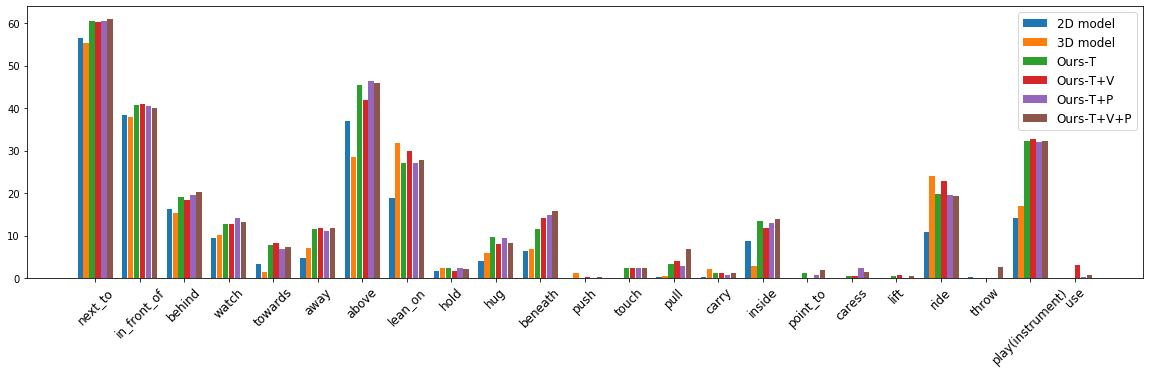

In [141]:
use_thresh = True # check this!
if use_thresh:
    keys = sorted_predicates_threshed
else:
    only_show_top = 50 # only show top 30 frequent predicates
    keys = sorted_predicates[:only_show_top]

precent_view = True
data = {
    "2D model": [image_baseline_pred_mean_APs[key]*100 if percent_view else image_baseline_pred_mean_APs[key] for key in keys], # list(image_baseline_pred_mean_APs.values())[:only_show_top],
    "3D model": [slowfast_pred_mean_APs[key]*100 if percent_view else slowfast_pred_mean_APs[key] for key in keys], # list(slowfast_pred_mean_APs.values())[:only_show_top],
    "Ours-T": [slowfast_trajectory_pred_mean_APs[key]*100 if percent_view else slowfast_trajectory_pred_mean_APs[key] for key in keys], # list(slowfast_trajectory_pred_mean_APs.values())[:only_show_top],
    "Ours-T+V": [slowfast_trajectory_toipool_pred_mean_APs[key]*100 if percent_view else slowfast_trajectory_toipool_pred_mean_APs[key] for key in keys], # list(slowfast_trajectory_toipool_pred_mean_APs.values())[:only_show_top],
    "Ours-T+P": [slowfast_trajectory_spatial_pred_mean_APs[key]*100 if percent_view else slowfast_trajectory_spatial_pred_mean_APs[key] for key in keys], # list(slowfast_trajectory_spatial_pred_mean_APs.values())[:only_show_top],
    "Ours-T+V+P": [slowfast_trajectory_toipool_spatial_pred_mean_APs[key]*100 if percent_view else slowfast_trajectory_toipool_spatial_pred_mean_APs[key] for key in keys], # list(slowfast_trajectory_spatial_pred_mean_APs.values())[:only_show_top],
}

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
fig.set_size_inches(20, 5)
#     plt.xticks(range(len(predicates[:only_show_top])), predicates[:only_show_top])
plt.xticks(range(len(keys)), keys)
#     ax.set_xticklabels(predicates)
# plt.title('Predicate mean AP')
plt.xticks(rotation=45,fontsize=12)
plt.show()